# Classification

## MNIST Dataset

We will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US
Census Bureau. Each image is labeled with the digit it represents

Importing MNIST data set from sklearn

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)

C:\Users\hi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
X, y = mnist.data, mnist.target

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

Data set contains <b>70,000 images</b> and each image has 784 features. This is because each image is 28 * 28 pixels. We can grab an instance's feature vector, reshape it to a 28 * 28 array, and display it using Matplotlib's imshow()

Displaying the image of random instance

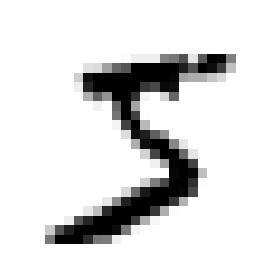

In [8]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap = 'binary') #to get a grayscale color using binary
    plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")
plt.show()

Above image look like <b>5</b>, let see what the label tells us

In [9]:
y[0]

'5'

sample images of images we have in the data set

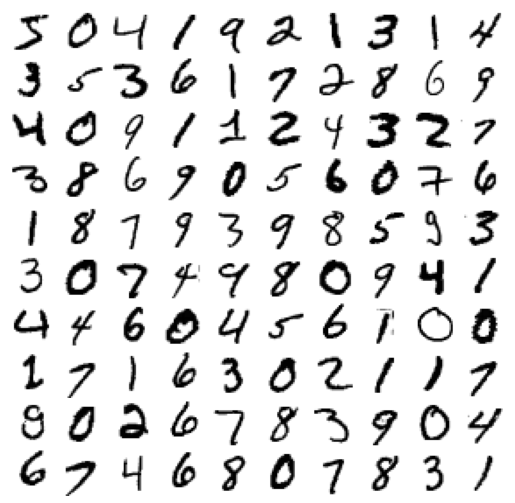

In [10]:
plt.figure(figsize=(9,9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10,10,idx+1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0,hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [11]:
# train test split manually
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable
of distinguishing between just two classes, <b>5 and non-5</b>.

In [12]:
y_train_5 = (y_train =='5') # true for all 5's, False for all other digits
y_test_5 = (y_test == '5')

We can start with Stochastic Gradient Descent(SGD) for classifier. This is capable for handling very large datasets efficiently

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Detect images of the number 5

In [14]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that the images represents a 5(True)

# Performance Measures

## Measuring Accuracy using Cross - Validation

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [16]:
#Implementing Cross-Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


## Confusion Matrices

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5,cv = 3)

Like cross_val_score() funtion, cross_val_predict() performs k-fold cross validation, but instead of returning the evaluation scores, it rerurns the predictions made on each test fold.

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred) 
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Each row in a confusion matrix represents an actual class, while each column represents
a predicted class. The first row of this matrix considers non-5 images (the
negative class): 53,892 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 687 were wrongly classified as 5s (false positives, also
called type I errors). The second row considers the images of 5s (the positive class):
1,891 were wrongly classified as non-5s (false negatives, also called type II errors),
while the remaining 3,530 were correctly classified as 5s (true positives).

We look at the accuracy of the positive predictions, is called <b>Precision of the classifier</b>

precision = <b>TP / (TP + FP)</b>

<b>TP</b> is the number or <b>True positives</b> and <b>FP</b> is the number of <b>False positives</b>

Precision is typically used along with another metric named <b>recall</b>, also called <b>sensitivity</b> or the <b>true positive rate (TPR)</b>: this is the ratio of positive instances that are correctly detected by the classifier


recall = <b>TP / (TP + FN)</b>

<b>FN</b> is the number or <b>False negatives</b>

## Precision and Recall

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) == 3530 / (687 + 3530)

True

In [20]:
recall_score(y_train_5, y_train_pred)# == 3530 / (1891 + 3530)

0.6511713705958311

An image represents a 5, it is correct only 83.7% of the time. Moreover,
it only detects 65.1% of the 5s.

<b>F1 Score</b>

It is convenient to combine precision and recall into a single metric called the <b>F1 score</b>. It is a <b>harmonic mean</b> of precision and recall. Harmonic meaan gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.

<b>F1 = 2 × ((precision × recall)/(precision + recall))</b>

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)


0.7325171197343846

## The Precision/Recall Trade-off

Scikit learn does not let us set the threshold directly, but it does give us access to the decision scores that it usess to make predictions. Instead of calling the classifier's <b>predict()</b> method, we can call its <b>decision_funtion()</b>, which return as score for each instance

In [22]:
y_scores =  sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [23]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

<b>SGDCClassifier</b> uses a threshold equal to 0, so the precedding code returns the same result as predict() method. so we can raise the threshold

In [24]:
threshold = 3000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 3,000.

First, use the cross_val_predict()
function to get the scores of all instances in the training set

In [25]:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

using the scores, the precision_recall_curve() function to compute percision and recall for all possible thresholds

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

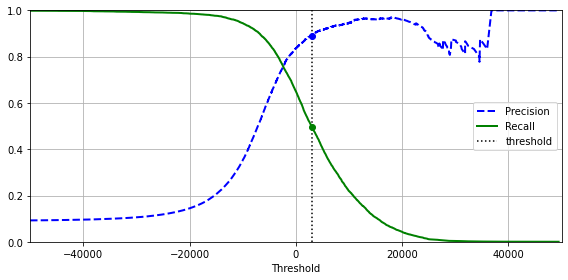

In [27]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label = 'Precision', linewidth = 2)
plt.plot(thresholds, recalls[:-1], "g-", label  ='Recall', linewidth = 2)
plt.vlines(threshold, 0,1.0,"k", "dotted", label = "threshold")

idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx],'bo')
plt.plot(thresholds[idx], recalls[idx],"go")
plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel('Threshold')
plt.legend(loc = "center right")
save_fig("precision_recall_vs_threshold_plot")
plt.show()

Another way
to select a good precision/recall trade-off is to plot precision directly against recall

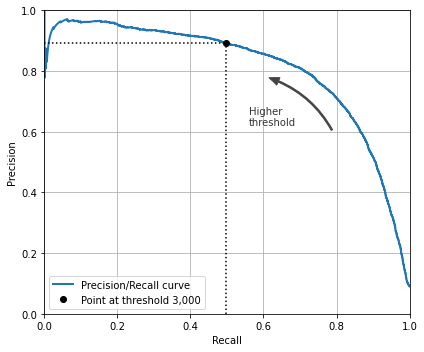

In [28]:
import matplotlib.patches as patches

plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, linewidth = 2, label = 'Precision/Recall curve')

plt.plot([recalls[idx], recalls[idx]],[0.,precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label = "Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color = "#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc = 'lower left')
save_fig("precision_vs_recall_plot")
plt.show()

We can search for the lowest threshold that gives you at least 90% percision. For this we can use the Numpy array's <b>argmax()</b> method. This returns the first index of the maximum value, which in this case means the first True value.

In [29]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [30]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [31]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [32]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

We have 90% precision classifier, but high precision classifier is not very usefull if its recall is too low. for many application 48% recall wouldn't be great at all

## The ROC curve
Receiver Operating Characteristic

It is very similar to the precision/recall curve, but instead of ploting precision versus recall, the ROC curve plots the <i>true positive rate</i>(another name for recall) against the <i>false positive rate</i>(FPR). The FPR(also called the fall-out). It is equal to 1 - the <i>true negative rate</i>(TNR), which is the ratio of negative instance that are correctly classified as negative. The TNR is also called <b>specificity</b>. The ROC curve plots <b>sensitivity</b>(recall) versus 1 - specificity.

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

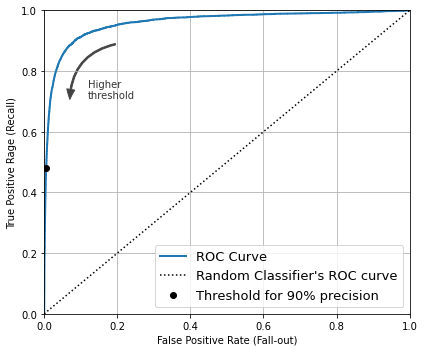

In [34]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize = (6,5))
plt.plot(fpr, tpr, linewidth = 2, label = "ROC Curve")
plt.plot([0,1],[0,1],'k:', label = "Random Classifier's ROC curve")
plt.plot([fpr_90],[tpr_90],"ko", label = "Threshold for 90% precision")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12,0.71, "Higher\nthreshold", color = "#333333")
plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rage (Recall)')
plt.grid()
plt.axis([0,1,0,1])
plt.legend(loc = 'lower right', fontsize = 13)
save_fig('roc_curve_plot')
plt.show()

To measure the <b>Area under the cureve(AUC)</b>. A perfect classifier will have a ROC AUC equal to 1. <br>
And purely random classifier wil have ROC AUC equal to 0.5

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

comparing <b>RandomForestClassifier</b> PR and F1 score with <b>SGDClassifier</b>

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

<b>predict_proba()</b> method has returns class probabilities for each instance

In [37]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3,
                                   method = 'predict_proba')
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

by looking the probabilities for the first two images in the training set
Model predicts the first image is positve with <b>89%</b> probability, and it predicts the second image is negative with <b>99%</b> probability.

In [38]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
y_train_5, y_scores_forest)

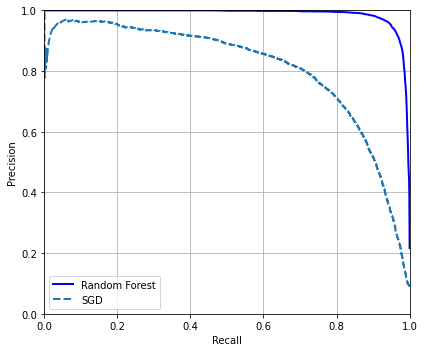

In [39]:
plt.figure(figsize = (6,5))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth = 2,
        label = 'Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label = 'SGD')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")
plt.show()

Comparing PR curves: the random forest classifier is <b>superior to the SGD classifier</b> because its PR curve is much <b>closer to the top-right corner</b>, and it has a greater <b>AUC</b>

In [40]:
y_train_pred_forest = y_probas_forest[:,1] >=0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [41]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multiclass Classification

We’ll only train on the first 2,000 images

Since there are
10 classes (i.e., more than 2), Scikit-Learn used the OvO strategy and trained 45
binary classifiers.

In [42]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [43]:
svm_clf.predict([some_digit])


array(['5'], dtype=object)

This code actually made 45 predictions—one per pair of classes—and
it selected the class that won the most duels.

In [44]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

The highest score is 9.3, and it’s indeed the one corresponding to class 5:

In [45]:
class_id = some_digit_scores.argmax()
class_id

5

the index of each class in the classes_ array
conveniently matches the class itself (e.g., the class at index 5 happens to be class '5'),
but in general we won’t be so lucky

In [46]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [47]:
svm_clf.classes_[class_id]

'5'

Scikit-Learn to use one-versus-one or one-versus-the-rest

In [48]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

make a prediction, and check the number of trained classifiers:

In [49]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [50]:
len(ovr_clf.estimators_)

10

SGDClassifier on a multiclass dataset and using it to make predictions

In [51]:
sgd_clf = SGDClassifier(random_state= 42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [51]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [52]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

To increse the accuracy implementing simple Scaling for the data

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')


## Error Analysis

Here, we will assume that we have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes.<br>
since there are now 10 classes instead of 2, the confusion matrix will contain quite a lot of numbers, and it may be hard to read.<br>
A colored diagram of the confusion matrix is much easier to analyze.

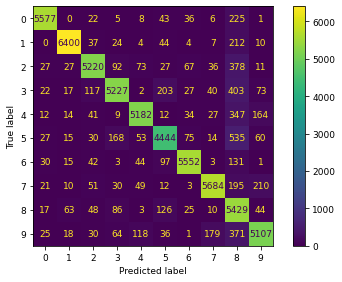

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9) 
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("CM_image_1")
plt.show()

If we see that the cell on diagonal in row #5 and column #5 looks slightly darker thatn the other digits. This could be cause the model made more errors on 5s, or because there are fewer 5s in the dataset than the other digits, That's why it's import to normalize the confusion matrix by dividing each value by the toal number of images in the corresponding(true) class( divvde by the row's sum). 

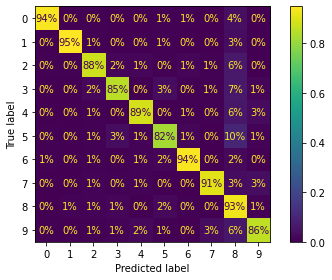

In [55]:
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
save_fig("CM_image_2")
plt.show()

We can see that only 82% of the images of 5s were classified correctly. The most common error the model made with images of 5s was to misclassify them as 8s. this happened for 10% of all 5s. But only 2% of 8s got misclassified as 5s; confusion matrices are generally not symmetrical!<br>
If we want to make the errors stand out more, you can try putting zero
weight on the correct predictions.

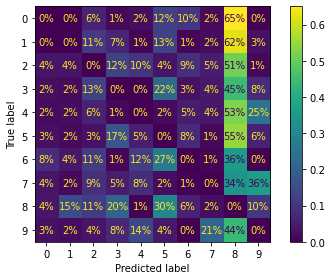

In [56]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10) 
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
save_fig("CM_image_3")
plt.show()


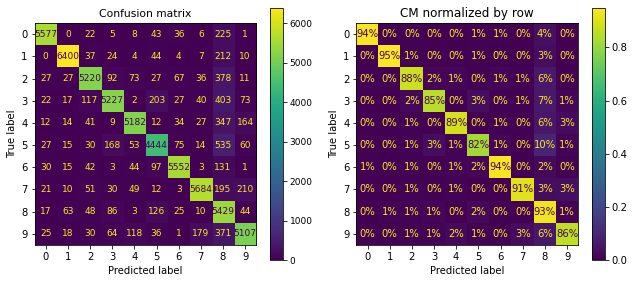

In [57]:
# for combining images together
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

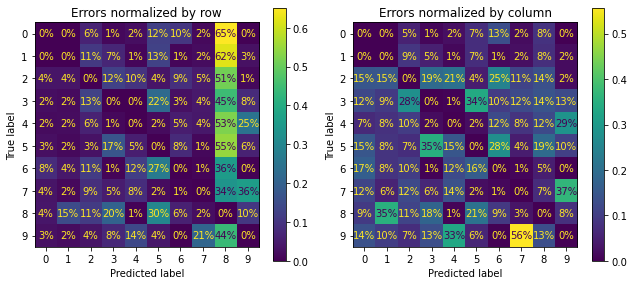

In [58]:
# for combining images together
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)

Now we can see much more clearly the kinds of errors the classifier makes. The
column for class 8 is now really bright, which confirms that many images got misclassified
as 8s. In fact this is the most common misclassification for almost all classes.

It is also possible to normalize the confusion matrix by column rather than by row. if you set normalize="pred", you get the diagram on the right in Figure For example, you can see that 56% of misclassified 7s are actually 9s.

Analyzing the confusion matrix often gives you insights into ways to improve your
classifier. Looking at these plots, it seems that your efforts should be spent on reducing
the false 8s.

Analyzing individual errors can also be a good way to gain insights into what your
classifier is doing and why it is failing.

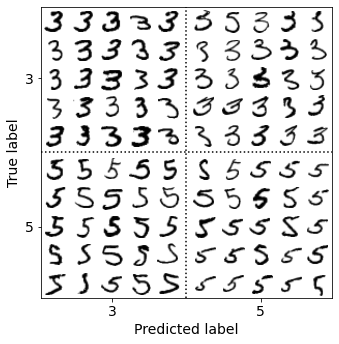

In [61]:
cl_a, cl_b = '3','5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()       

The main difference between 3s and 5s is the position of the small line that joins the
top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left,
the classifier might classify it as a 5, and vice versa.

## Multilabel Classification

Until now, each instance has always been assigned to just one class. But in some cases
you may want your classifier to output multiple classes for each instance.

In [65]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [68]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

The above code creates a y_multilabel array containing two target labels for each digit
image: the first indicates whether or not the digit is large (7, 8, or 9), and the second
indicates whether or not it is odd. Then the code creates a KNeighborsClassifier
instance, which supports multilabel classification , and trains
this model using the multiple targets array.

In [69]:
knn_clf.predict([some_digit])

array([[False,  True]])

measure the <b>F1 score</b> for each
individual label , then simply
compute the average score.

In [72]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

shows that we get a negligible performance improvement when we
set average="weighted" because the classes are already pretty well balanced.

In [73]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

## Multioutput Classification

It is a generalization of multilabel
classification where each label can be multiclass (i.e., it can have more than two
possible values).

This build a system that removes noise from images. It will take
as input a noisy digit image, and it will (hopefully) output a clean digit image,

In [76]:
np.random.seed(42) 
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

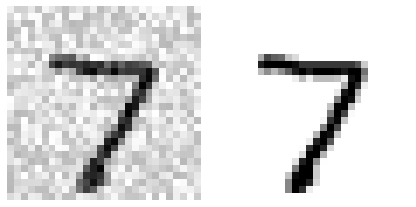

In [78]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

let's train the classifier and make it clean up this image

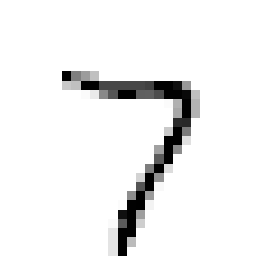

In [80]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")
plt.show()

## Checking Accuracy

In [82]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

Fine tuning Hyper parameter to improve the accuracy

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [84]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [85]:
grid_search.best_score_

0.9441999999999998

Score was dropped to 94% when we only trained 10000 image. So we can try with full training set

In [86]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

### We Reachead 97% Accuracy